# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city+'&appid='+weather_api_key+'&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | arkhangel'sk
Processing Record 3 of Set 1 | maracaibo
Processing Record 4 of Set 1 | newman
Processing Record 5 of Set 1 | fomboni
Processing Record 6 of Set 1 | bandundu
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | arar
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | gemena
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | inarajan village
Processing Record 15 of Set 1 | port saint john's
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | sao vicente
Processing Record 18 of Set 1 | isfahan
Processing Record 19 of Set 1 | baganga
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | zhalantun
Processing Record 22 of Set 1 | taurage
Pro

Processing Record 40 of Set 4 | colby
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | winkler
Processing Record 43 of Set 4 | cavan
Processing Record 44 of Set 4 | constantia
Processing Record 45 of Set 4 | fort mcmurray
Processing Record 46 of Set 4 | quellon
Processing Record 47 of Set 4 | brookings
Processing Record 48 of Set 4 | pacific grove
Processing Record 49 of Set 4 | boda
Processing Record 0 of Set 5 | east london
Processing Record 1 of Set 5 | dudinka
Processing Record 2 of Set 5 | inirida
Processing Record 3 of Set 5 | nadym
Processing Record 4 of Set 5 | puerto deseado
Processing Record 5 of Set 5 | susuman
Processing Record 6 of Set 5 | nova sintra
Processing Record 7 of Set 5 | saint-pierre
Processing Record 8 of Set 5 | tobi village
City not found. Skipping...
Processing Record 9 of Set 5 | qala i naw
Processing Record 10 of Set 5 | egilsstadir
Processing Record 11 of Set 5 | bowen
Processing Record 12 of Set 5 | fisterra
Processing Record 13 o

Processing Record 29 of Set 8 | puerto santa
Processing Record 30 of Set 8 | buta
Processing Record 31 of Set 8 | mejit
Processing Record 32 of Set 8 | xilin hot
Processing Record 33 of Set 8 | taoudenni
Processing Record 34 of Set 8 | chortoq
Processing Record 35 of Set 8 | burela de cabo
Processing Record 36 of Set 8 | la passe
Processing Record 37 of Set 8 | barakani
Processing Record 38 of Set 8 | cimislia
Processing Record 39 of Set 8 | kerben
Processing Record 40 of Set 8 | ghat
Processing Record 41 of Set 8 | camapua
Processing Record 42 of Set 8 | ginir
Processing Record 43 of Set 8 | kattivakkam
Processing Record 44 of Set 8 | gotsucho
Processing Record 45 of Set 8 | hays
Processing Record 46 of Set 8 | port augusta
Processing Record 47 of Set 8 | koesan
Processing Record 48 of Set 8 | karratha
Processing Record 49 of Set 8 | hell-ville
Processing Record 0 of Set 9 | bratsk
Processing Record 1 of Set 9 | santo antonio do ica
Processing Record 2 of Set 9 | puerto colombia
Proce

Processing Record 19 of Set 12 | sibolga
Processing Record 20 of Set 12 | bengkulu
Processing Record 21 of Set 12 | islamkot
Processing Record 22 of Set 12 | dickson
Processing Record 23 of Set 12 | pirallahi
Processing Record 24 of Set 12 | elkins
Processing Record 25 of Set 12 | manta
Processing Record 26 of Set 12 | cartagena
Processing Record 27 of Set 12 | mokhsogollokh
Processing Record 28 of Set 12 | opuwo
Processing Record 29 of Set 12 | san julian
Processing Record 30 of Set 12 | anchorage
Processing Record 31 of Set 12 | tarauaca
Processing Record 32 of Set 12 | aripuana
Processing Record 33 of Set 12 | cockburn town
Processing Record 34 of Set 12 | awjilah
Processing Record 35 of Set 12 | north bend
Processing Record 36 of Set 12 | freeport
Processing Record 37 of Set 12 | roma
Processing Record 38 of Set 12 | petoskey
Processing Record 39 of Set 12 | siemiatycze
-----------------------------
Data Retrieval Complete      
-----------------------------


In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.93,76,86,15.59,TF,1699318419
1,arkhangel'sk,64.5401,40.5433,2.85,96,100,2.12,RU,1699318420
2,maracaibo,10.6317,-71.6406,27.04,84,100,2.70,VE,1699318319
3,newman,37.3138,-121.0208,20.72,72,100,1.79,US,1699318422
4,fomboni,-12.2800,43.7425,27.07,76,0,7.15,KM,1699318422


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.93,76,86,15.59,TF,1699318419
1,arkhangel'sk,64.5401,40.5433,2.85,96,100,2.12,RU,1699318420
2,maracaibo,10.6317,-71.6406,27.04,84,100,2.70,VE,1699318319
3,newman,37.3138,-121.0208,20.72,72,100,1.79,US,1699318422
4,fomboni,-12.2800,43.7425,27.07,76,0,7.15,KM,1699318422


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

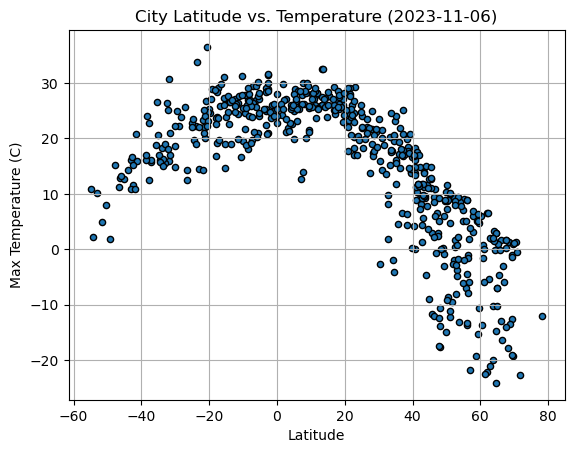

In [37]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Temperature (2023-11-06)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

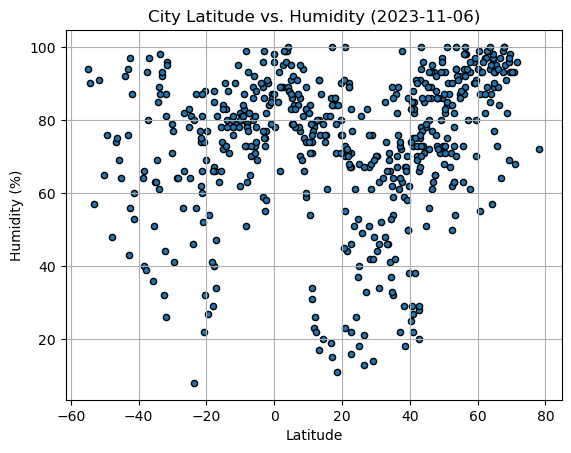

In [38]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-11-06)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

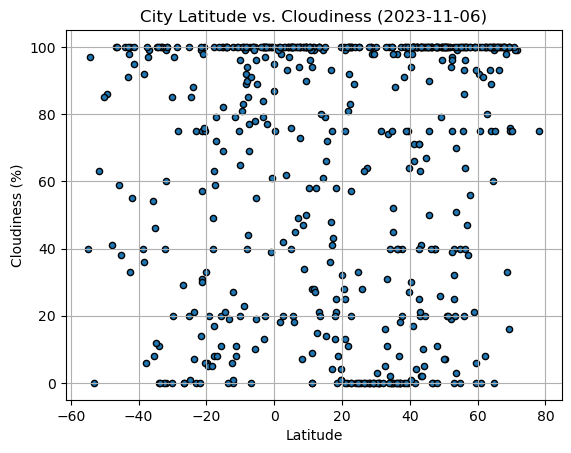

In [39]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-11-06)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

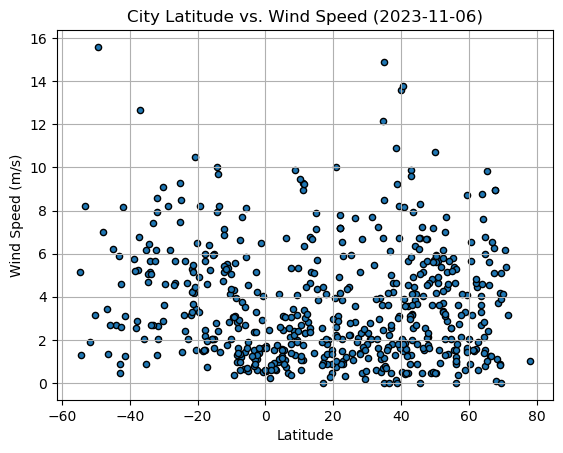

In [40]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-11-06)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def regress(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    return regress_values, line_eq, rvalue

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arkhangel'sk,64.5401,40.5433,2.85,96,100,2.12,RU,1699318420
2,maracaibo,10.6317,-71.6406,27.04,84,100,2.70,VE,1699318319
3,newman,37.3138,-121.0208,20.72,72,100,1.79,US,1699318422
7,arar,30.9753,41.0381,20.01,34,0,2.06,SA,1699318424
8,ilulissat,69.2167,-51.1000,-12.49,69,16,4.18,GL,1699318425


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.93,76,86,15.59,TF,1699318419
4,fomboni,-12.2800,43.7425,27.07,76,0,7.15,KM,1699318422
5,bandundu,-3.3167,17.3667,22.40,96,100,1.16,CD,1699318423
6,luderitz,-26.6481,15.1594,14.36,82,0,4.65,NaN,1699318424
14,port saint john's,-31.6229,29.5448,20.91,96,100,2.66,ZA,1699318430


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8493968127603408


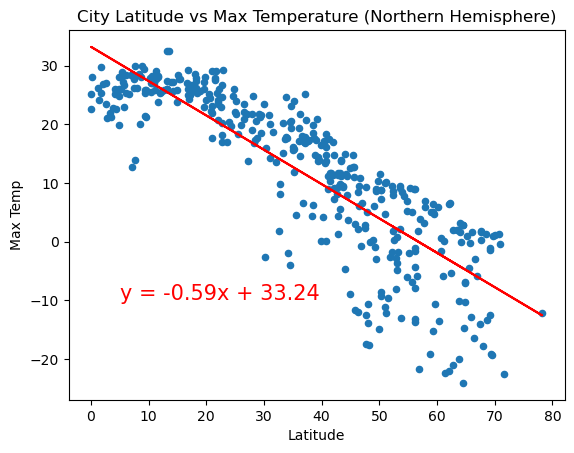

In [48]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp")
regress_values, line_eq, rvalue = regress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

print(f"The r-value is: {rvalue}")

plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")
plt.title('City Latitude vs Max Temperature (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.7150368137786048


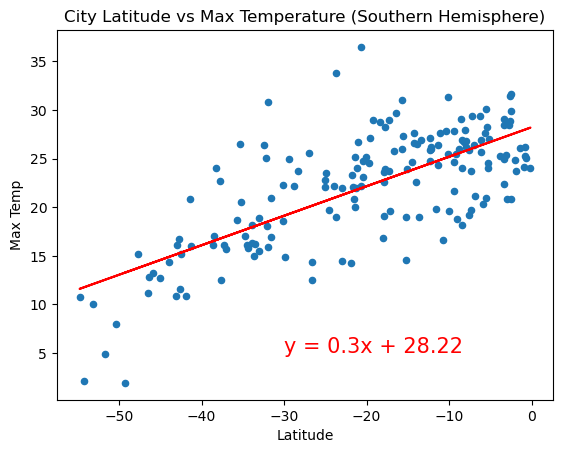

In [49]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp")
regress_values, line_eq, rvalue = regress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

print(f"The r-value is: {rvalue}")

plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")
plt.title('City Latitude vs Max Temperature (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** The two scatter plots above illustrate the relationship between the latitude and the max temperature of the city. The scatter plots support the hypothesis that the closer the city is to the equator (where latitude = 0), the greater the max temperature they have. Regression lines plottes also illustra this point, with a positive sloped regression line for the southern hemisphere as latitudes increase to the equator, and a negatively sloped regression line for the northern hemisphere. The r-values of -0.85 and 0.72 shows a strong correlation between latitude and max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.232805502996676


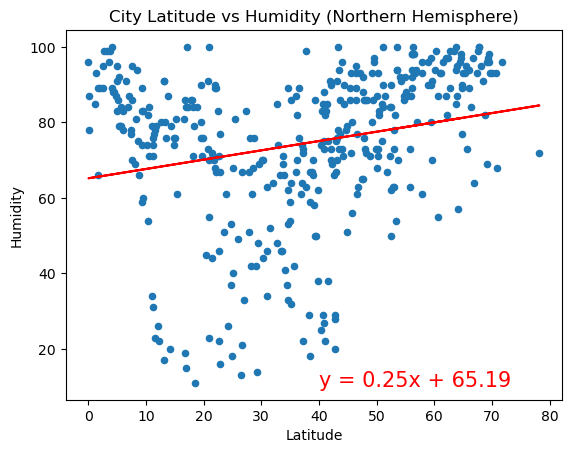

In [50]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity")
regress_values, line_eq, rvalue = regress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

print(f"The r-value is: {rvalue}")

plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title('City Latitude vs Humidity (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.19131573133458418


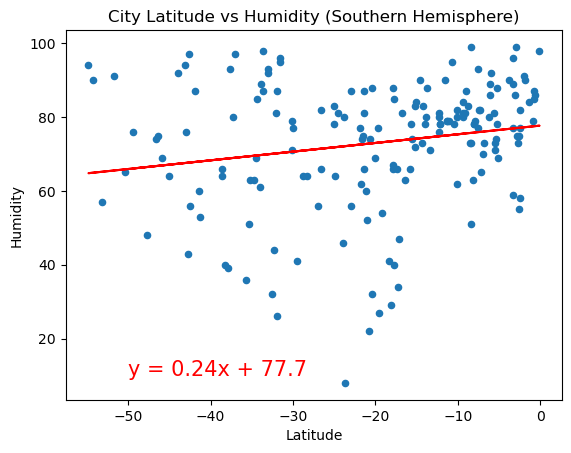

In [51]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity")
regress_values, line_eq, rvalue = regress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

print(f"The r-value is: {rvalue}")

plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title('City Latitude vs Humidity (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** The two scatter plots above illustrate the relationship between the city latitude and city humidity. With a r-value of 0.23 and 0.19, this indicates a weak positive correlation between latitude and humidity for both northern and southern hemispheres. There is little evidence to support the hypothesis that the equator is more humid than other latitudes.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12434998010870382


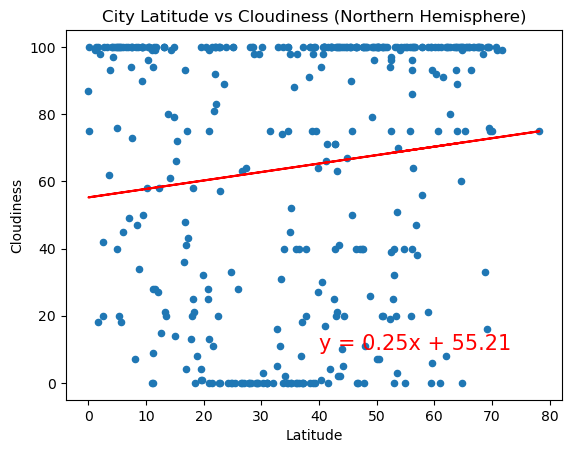

In [56]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness")
regress_values, line_eq, rvalue = regress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

print(f"The r-value is: {rvalue}")

plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title('City Latitude vs Cloudiness (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.12595990292626785


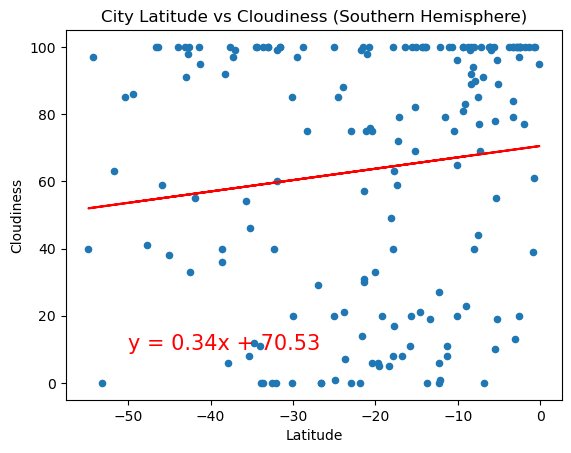

In [53]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness")
regress_values, line_eq, rvalue = regress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

print(f"The r-value is: {rvalue}")

plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title('City Latitude vs Cloudiness (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** From the two scatter plots above, both nothern adn southern hemisphere scatter plots have a regression line with a positive slope o 0.25and 0.34 respectively, indicating a positive linear relationshiop between latitude and cloudiness. HOWEVER, their respective r-values of 0.12 and 0.13 indicates a weak correlation between latitude and cloudiness, weaker than the correlation found between latitude and max temperature.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1372225264668144


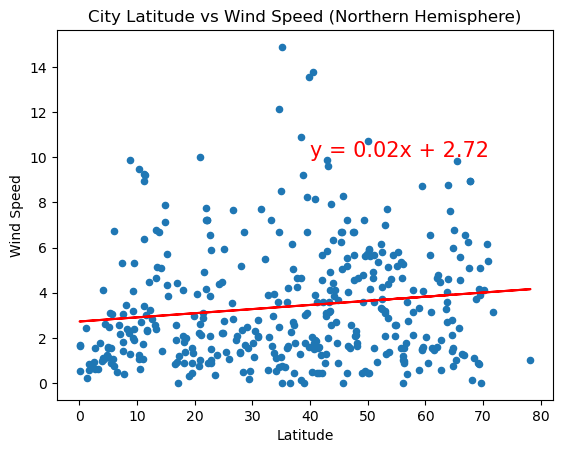

In [57]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed")
regress_values, line_eq, rvalue = regress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

print(f"The r-value is: {rvalue}")

plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title('City Latitude vs Wind Speed (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.2857715450797176


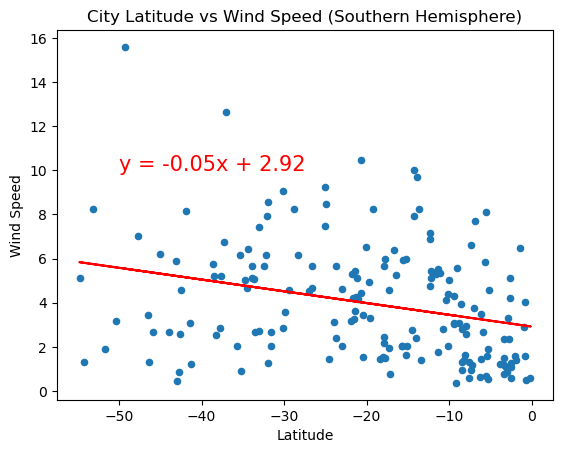

In [58]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed")
regress_values, line_eq, rvalue = regress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

print(f"The r-value is: {rvalue}")

plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title('City Latitude vs Wind Speed (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** The relationships between latitude and windspeed were plotted on scatter plots for the northern and southern hemisphere. Fitted regression lines indicate the further the city is away from the equator, the higher the wind speeds they experience. However, these regression lines have an r-values of 0.137 and -0.286. This describes that only 13.7% and 28.6% of the wind speeds data spread can be explained by the independent variable 'Latitude' , whilst the majority of windspeed is explained by other unknown factors. Concluding that latitude does not greatly affect changes in windspeed.